<a href="https://colab.research.google.com/github/yadgire7/AUDIO-PROCESSING-ML/blob/master/generate_spectrogram_from_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [2]:
folder_path = "/content/drive/MyDrive/SAIL/sample_audio/"
piano_file = "piano.mp3"
drum_file = "drum.mp3"

In [4]:
# load files
piano, p_sr = librosa.load(os.path.join(folder_path, piano_file))
drum, d_sr= librosa.load(os.path.join(folder_path, drum_file))

In [5]:
piano_player = ipd.Audio(os.path.join(folder_path, piano_file))
piano_player

In [6]:
drum_player = ipd.Audio(os.path.join(folder_path, drum_file))
drum_player

In [7]:
FRAME_SIZE = 2048
HOP_SIZE = 512


In [8]:
s_piano = librosa.stft(piano, n_fft= FRAME_SIZE, hop_length= HOP_SIZE)
s_piano.shape

(1025, 603)

In [9]:
type(s_piano[0][0])

numpy.complex64

Calculate spectrogram

In [10]:
y_piano = np.abs(s_piano)**2

In [11]:
y_piano.shape

(1025, 603)

In [12]:
type(y_piano[0][0])

numpy.float32

Visualize the spectrogram in heatmap

In [14]:
def plot_spectrogrm(y_signal, sr, hop_length, y_axis = "linear"):
    plt.figure(figsize=(15,10))
    librosa.display.specshow(y_signal, sr = sr, hop_length=hop_length, x_axis="time", y_axis= y_axis)
    plt.colorbar(format = "%+.2f")

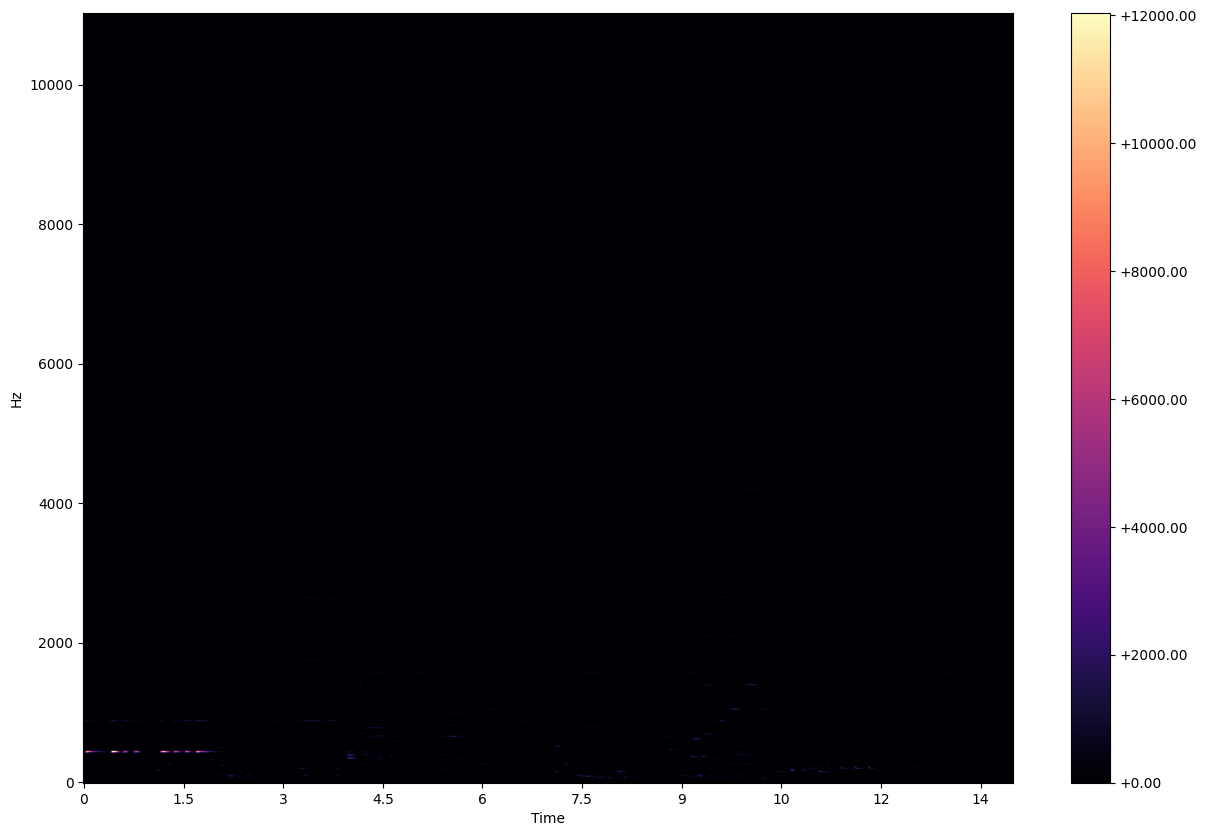

In [15]:
plot_spectrogrm(y_signal=y_piano, sr= p_sr, hop_length= HOP_SIZE)

Log Amplitude Spectrogram

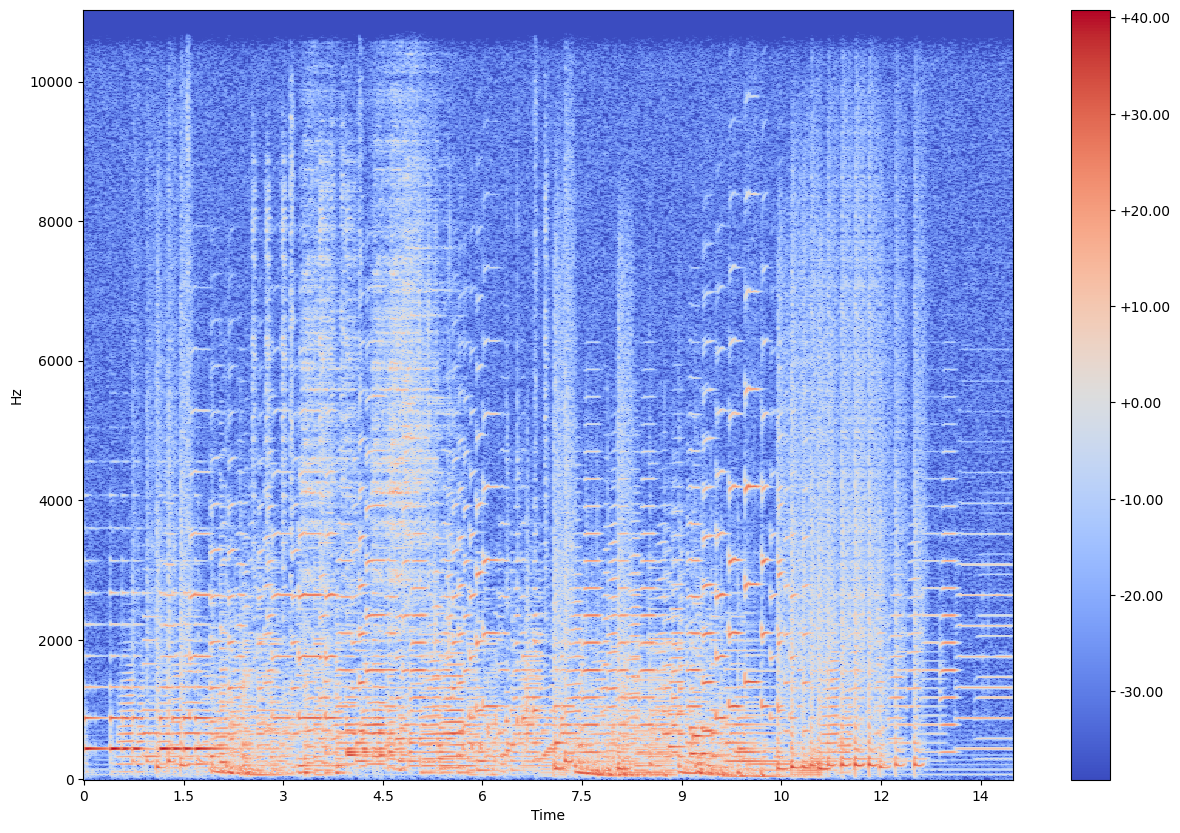

In [17]:
y_piano_log = librosa.power_to_db(y_piano)
plot_spectrogrm(y_signal=y_piano_log, sr= p_sr, hop_length= HOP_SIZE)

Log Frequency Spectrogram

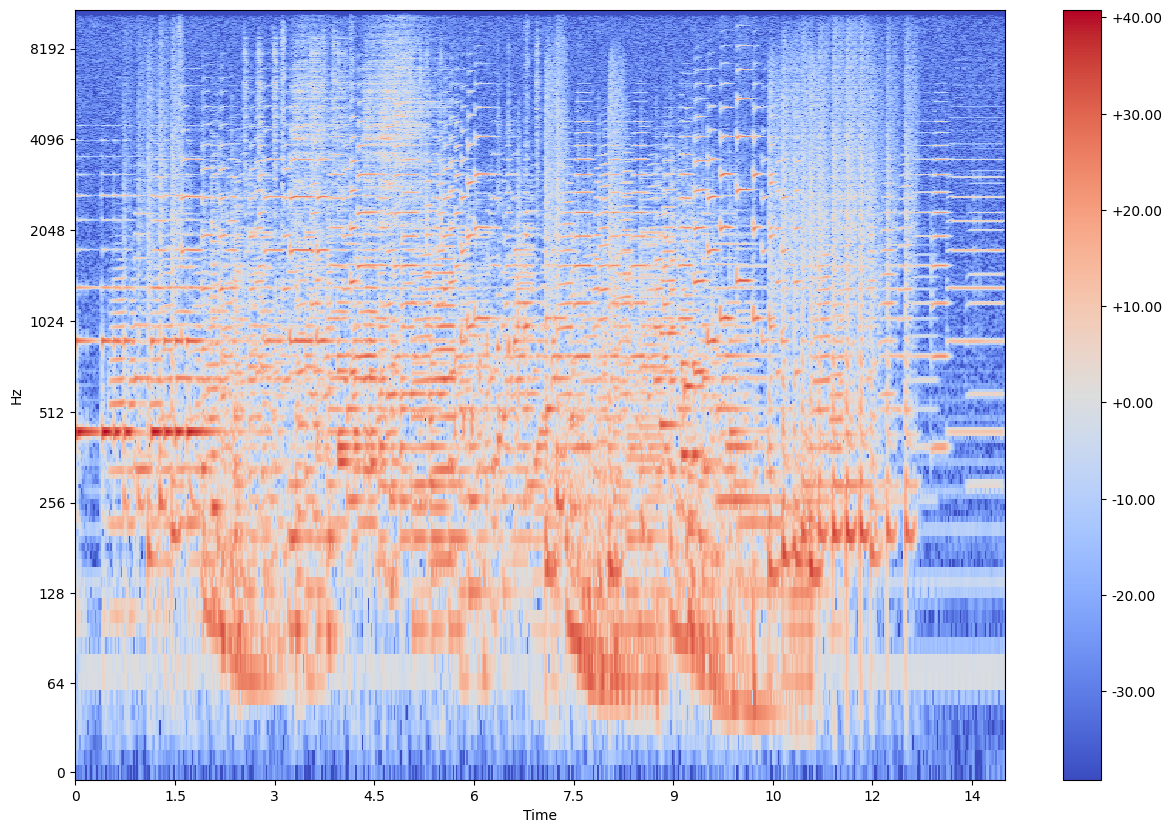

In [19]:
plot_spectrogrm(y_signal=y_piano_log, sr= p_sr, hop_length= HOP_SIZE, y_axis="log")